💾 1.Download Historical Data

Goal: get price data (e.g., AAPL, MSFT, AMZN, GOOGL, SPY) from Yahoo Finance.

In [91]:
from operator import index

import numpy as np
import yfinance as yf
from numpy.ma.core import transpose

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "SPY"]
stocks = yf.download(tickers, period="max")

/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_18071/1189452190.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(tickers, period="max")
[*********************100%***********************]  5 of 5 completed


In [92]:
stocks

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY   
Date                                                                     
1980-12-12    0.098485         NaN         NaN         NaN         NaN   
1980-12-15    0.093347         NaN         NaN         NaN         NaN   
1980-12-16    0.086495         NaN         NaN         NaN         NaN   
1980-12-17    0.088636         NaN         NaN         NaN         NaN   
1980-12-18    0.091206         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2025-10-30  271.399994  222.860001  281.480011  525.760010  679.830017   
2025-10-31  270.369995  244.220001  281.190002  517.809998  682.059998   
2025-11-03  269.049988  254.000000  283.720001  517.030029  683.340027   
2025-11-04  270.040009  249.320007  277.540009  514.330017  675.239990   
2025-11-07  268.540009         NaN         NaN  495.709991         NaN   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY  ...   
Date                                                                    ...   
1980-12-12    0.098913         NaN         NaN         NaN         NaN  ...   
1980-12-15    0.093775         NaN         NaN         NaN         NaN  ...   
1980-12-16    0.086924         NaN         NaN         NaN         NaN  ...   
1980-12-17    0.089064         NaN         NaN         NaN         NaN  ...   
1980-12-18    0.091634         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2025-10-30  274.140015  228.440002  291.589996  534.969971  685.940002  ...   
2025-10-31  277.320007  250.500000  286.000000  529.320007  685.080017  ...   
2025-11-03  270.850006  258.600006  285.529999  524.960022  685.799988  ...   
2025-11-04  271.489990  257.010010  281.269989  515.549988  679.960022  ...   
2025-11-07  272.290009         NaN         NaN  499.377014         NaN  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY   
Date                                                                     
1980-12-12    0.098485         NaN         NaN         NaN         NaN   
1980-12-15    0.093775         NaN         NaN         NaN         NaN   
1980-12-16    0.086924         NaN         NaN         NaN         NaN   
1980-12-17    0.088636         NaN         NaN         NaN         NaN   
1980-12-18    0.091206         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2025-10-30  271.989990  227.059998  291.589996  530.479980  683.900024   
2025-10-31  276.989990  250.100006  283.209991  528.880005  685.039978   
2025-11-03  270.420013  255.360001  282.179993  519.809998  685.669983   
2025-11-04  268.329987  250.380005  276.750000  511.760010  676.109985   
2025-11-07  269.795013         NaN         NaN  496.679993         NaN   

Price          Volume                                                   
Ticker           AAPL         AMZN       GOOGL        MSFT         SPY  
Date                                                                    
1980-12-12  469033600          NaN         NaN         NaN         NaN  
1980-12-15  175884800          NaN         NaN         NaN         NaN  
1980-12-16  105728000          NaN         NaN         NaN         NaN  
1980-12-17   86441600          NaN         NaN         NaN         NaN  
1980-12-18   73449600          NaN         NaN         NaN         NaN  
...               ...          ...         ...         ...         ...  
2025-10-30   69886500  102252900.0  74876000.0  41023100.0  76335800.0  
2025-10-31   86167100  166340800.0  39267900.0  34006400.0  87164100.0  
2025-11-03   501

🧹 2. Data Cleaning and Preparation

Goal: ensure data consistency and handle missing values.

In [93]:
stocks = stocks.drop(columns={"High", "Low", "Open", "Volume"})
stocks

Price            Close                                                
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY
Date                                                                  
1980-12-12    0.098485         NaN         NaN         NaN         NaN
1980-12-15    0.093347         NaN         NaN         NaN         NaN
1980-12-16    0.086495         NaN         NaN         NaN         NaN
1980-12-17    0.088636         NaN         NaN         NaN         NaN
1980-12-18    0.091206         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2025-10-30  271.399994  222.860001  281.480011  525.760010  679.830017
2025-10-31  270.369995  244.220001  281.190002  517.809998  682.059998
2025-11-03  269.049988  254.000000  283.720001  517.030029  683.340027
2025-11-04  270.040009  249.320007  277.540009  514.330017  675.239990
2025-11-07  268.540009         NaN         NaN  495.709991         NaN

[11317 rows x 5 columns]

In [94]:
stocks = stocks.dropna()
stocks

Price            Close                                                
Ticker            AAPL        AMZN       GOOGL        MSFT         SPY
Date                                                                  
2004-08-19    0.460959    1.931500    2.493811   16.744204   73.764618
2004-08-20    0.462310    1.975500    2.691894   16.793598   74.282341
2004-08-23    0.466513    1.972500    2.718985   16.867910   74.094078
2004-08-24    0.479572    1.952500    2.606397   16.867910   74.194916
2004-08-25    0.496083    2.015000    2.634483   17.059856   74.699196
...                ...         ...         ...         ...         ...
2025-10-29  269.700012  230.300003  274.570007  541.549988  687.390015
2025-10-30  271.399994  222.860001  281.480011  525.760010  679.830017
2025-10-31  270.369995  244.220001  281.190002  517.809998  682.059998
2025-11-03  269.049988  254.000000  283.720001  517.030029  683.340027
2025-11-04  270.040009  249.320007  277.540009  514.330017  675.239990

[5338 rows x 5 columns]

📈3. Visual Exploration

Goal: visualize price movements over time.

Plot line charts of each stock’s price.

Compare stocks to the SPY index.

Optionally use a logarithmic scale for prices.

<Axes: title={'center': 'Stocks Closing Prices'}, xlabel='Date'>

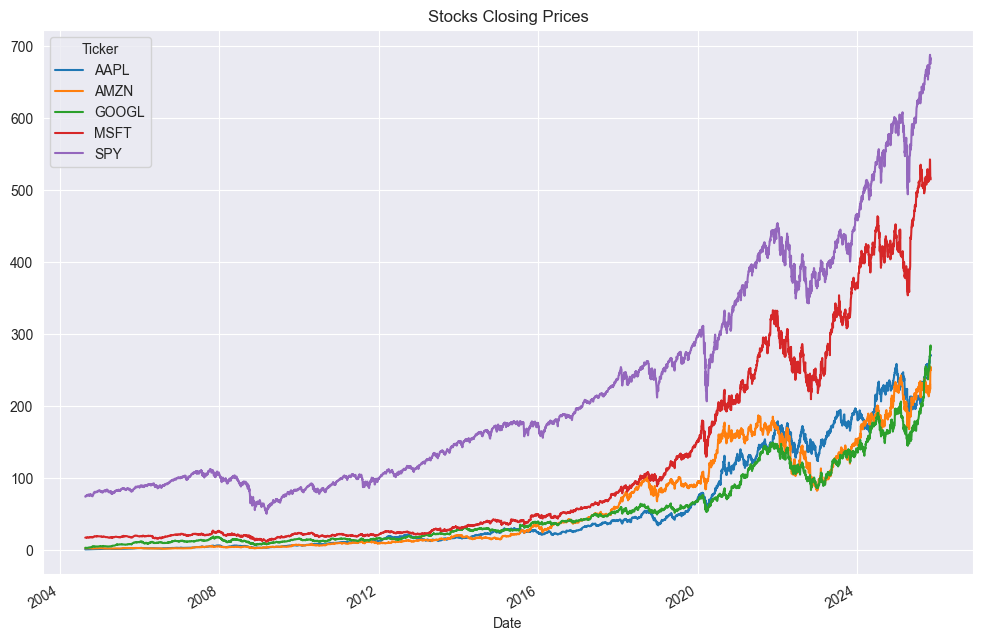

In [95]:
stocks["Close"].plot(title="Stocks Closing Prices", figsize=(12, 8))

<Axes: title={'center': 'SPY Closing Prices'}, xlabel='Date'>

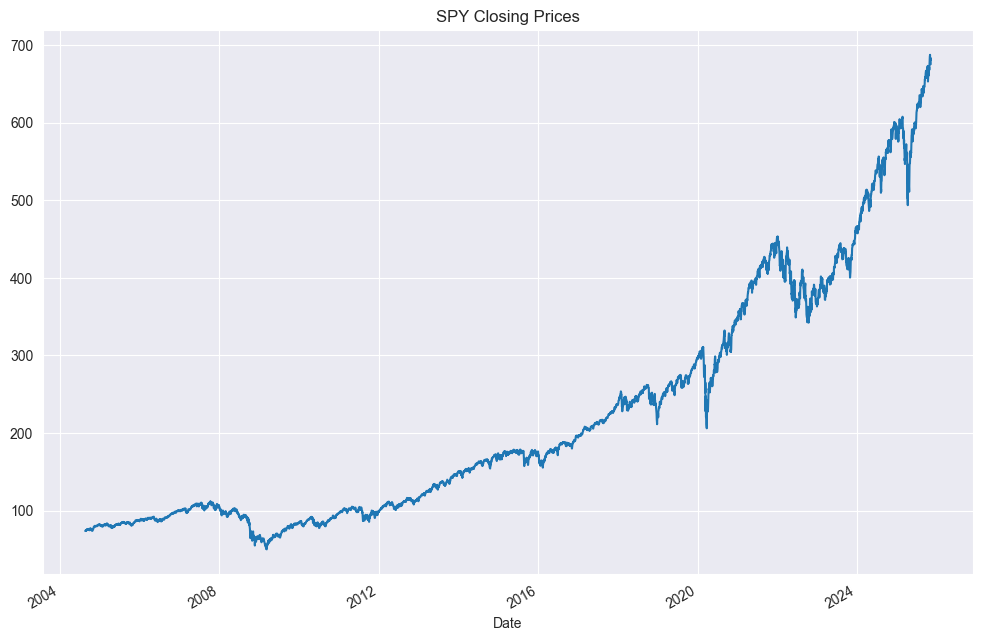

In [96]:
stocks["Close", "SPY"].plot(title="SPY Closing Prices", figsize=(12, 8))

🔢 5. Compute Returns

Goal: transform prices into returns for comparison and add them to the dataframe

In [28]:
import pandas as pd

In [97]:
returns = pd.DataFrame()

In [98]:
returns = pd.concat({
    "Linear Returns" : stocks/stocks.shift(1) - 1,
    "Log Returns" : stocks/stocks.shift(1)
}, axis=1)
returns

Linear Returns                                         Log Returns  \
Price               Close                                               Close   
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-19            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-20       0.002930  0.022780  0.079430  0.002950  0.007019    1.002930   
2004-08-23       0.009091 -0.001519  0.010064  0.004425 -0.002534    1.009091   
2004-08-24       0.027993 -0.010139 -0.041408  0.000000  0.001361    1.027993   
2004-08-25       0.034429  0.032010  0.010776  0.011379  0.006797    1.034429   
...                   ...       ...       ...       ...       ...         ...   
2025-10-29       0.002602  0.004580  0.026545 -0.000959  0.000480    1.002602   
2025-10-30       0.006303 -0.032306  0.025167 -0.029157 -0.010998    1.006303   
2025-10-31      -0.003795  0.095845 -0.001030 -0.015121  0.003280    0.996205   
2025-11-03      -0.004882  0.040046  0.008997 -0.001506  0.001877    0.995118   
2025-11-04       0.003680 -0.018425 -0.021782 -0.005222 -0.011854    1.003680   

                                                    
Price                                               
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-19       NaN       NaN       NaN       NaN  
2004-08-20  1.022780  1.079430  1.002950  1.007019  
2004-08-23  0.998481  1.010064  1.004425  0.997466  
2004-08-24  0.989861  0.958592  1.000000  1.001361  
2004-08-25  1.032010  1.010776  1.011379  1.006797  
...              ...       ...       ...       ...  
2025-10-29  1.004580  1.026545  0.999041  1.000480  
2025-10-30  0.967694  1.025167  0.970843  0.989002  
2025-10-31  1.095845  0.998970  0.984879  1.003280  
2025-11-03  1.040046  1.008997  0.998494  1.001877  
2025-11-04  0.981575  0.978218  0.994778  0.988146  

[5338 rows x 10 columns]

In [99]:
returns = returns.droplevel(1, axis=1)

In [100]:
returns = returns.dropna()

In [101]:
returns

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20       0.002930  0.022780  0.079430  0.002950  0.007019    1.002930   
2004-08-23       0.009091 -0.001519  0.010064  0.004425 -0.002534    1.009091   
2004-08-24       0.027993 -0.010139 -0.041408  0.000000  0.001361    1.027993   
2004-08-25       0.034429  0.032010  0.010776  0.011379  0.006797    1.034429   
2004-08-26       0.048714 -0.002730  0.018019 -0.003992  0.000000    1.048714   
...                   ...       ...       ...       ...       ...         ...   
2025-10-29       0.002602  0.004580  0.026545 -0.000959  0.000480    1.002602   
2025-10-30       0.006303 -0.032306  0.025167 -0.029157 -0.010998    1.006303   
2025-10-31      -0.003795  0.095845 -0.001030 -0.015121  0.003280    0.996205   
2025-11-03      -0.004882  0.040046  0.008997 -0.001506  0.001877    0.995118   
2025-11-04       0.003680 -0.018425 -0.021782 -0.005222 -0.011854    1.003680   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20  1.022780  1.079430  1.002950  1.007019  
2004-08-23  0.998481  1.010064  1.004425  0.997466  
2004-08-24  0.989861  0.958592  1.000000  1.001361  
2004-08-25  1.032010  1.010776  1.011379  1.006797  
2004-08-26  0.997270  1.018019  0.996008  1.000000  
...              ...       ...       ...       ...  
2025-10-29  1.004580  1.026545  0.999041  1.000480  
2025-10-30  0.967694  1.025167  0.970843  0.989002  
2025-10-31  1.095845  0.998970  0.984879  1.003280  
2025-11-03  1.040046  1.008997  0.998494  1.001877  
2025-11-04  0.981575  0.978218  0.994778  0.988146  

[5337 rows x 10 columns]

<Axes: title={'center': 'Log Returns of Apple'}, xlabel='Date'>

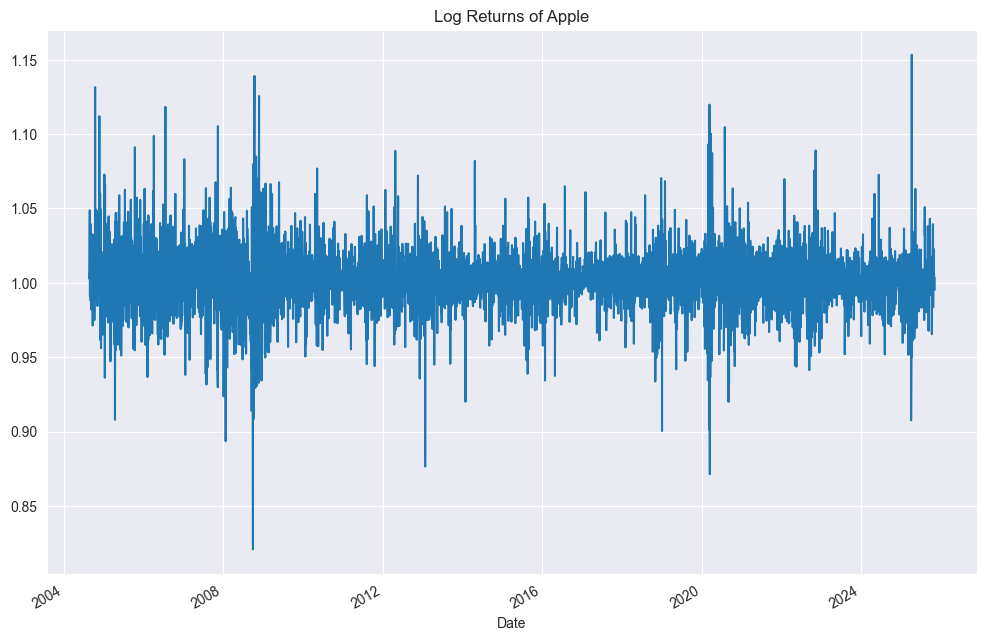

In [106]:
returns["Log Returns", "AAPL"].plot(title="Log Returns of Apple", figsize=(12, 8))

📊 6. Descriptive Statistics

Goal: summarize key properties of returns.

Compute mean, standard deviation, skewness, kurtosis, min, max.

In [110]:
stats = returns.describe()
stats

Linear Returns                                                      \
Ticker           AAPL         AMZN        GOOGL         MSFT          SPY   
count     5337.000000  5337.000000  5337.000000  5337.000000  5337.000000   
mean         0.001404     0.001193     0.001069     0.000785     0.000486   
std          0.020456     0.023856     0.019318     0.016924     0.011952   
min         -0.179195    -0.218220    -0.116341    -0.147390    -0.109424   
25%         -0.008181    -0.009939    -0.008018    -0.007043    -0.003932   
50%          0.001157     0.000669     0.000885     0.000480     0.000728   
75%          0.011669     0.012363     0.010260     0.008823     0.005791   
max          0.153289     0.269497     0.199915     0.186047     0.145198   

        Log Returns                                                      
Ticker         AAPL         AMZN        GOOGL         MSFT          SPY  
count   5337.000000  5337.000000  5337.000000  5337.000000  5337.000000  
mean       1.001404     1.001193     1.001069     1.000785     1.000486  
std        0.020456     0.023856     0.019318     0.016924     0.011952  
min        0.820805     0.781780     0.883659     0.852610     0.890576  
25%        0.991819     0.990061     0.991982     0.992957     0.996068  
50%        1.001157     1.000669     1.000885     1.000480     1.000728  
75%        1.011669     1.012363     1.010260     1.008823     1.005791  
max        1.153289     1.269497     1.199915     1.186047     1.145198

In [111]:
import scipy.stats as sp

In [148]:
kurt = sp.kurtosis(returns)
kurt = pd.Series(kurt)
kurt

0     5.862487
1    14.547306
2     8.894656
3    10.068595
4    15.487457
5     5.862487
6    14.547306
7     8.894656
8    10.068595
9    15.487457
dtype: float64

In [144]:
stats["kurt"] = kurt
stats

,"(Linear Returns, AAPL)","(Linear Returns, AMZN)","(Linear Returns, GOOGL)","(Linear Returns, MSFT)","(Linear Returns, SPY)","(Log Returns, AAPL)","(Log Returns, AMZN)","(Log Returns, GOOGL)","(Log Returns, MSFT)","(Log Returns, SPY)",...,1,2,3,4,5,6,7,8,9,kurt
count,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.001404,0.001193,0.001069,0.000785,0.000486,1.001404,1.001193,1.001069,1.000785,1.000486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.020456,0.023856,0.019318,0.016924,0.011952,0.020456,0.023856,0.019318,0.016924,0.011952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.179195,-0.218220,-0.116341,-0.147390,-0.109424,0.820805,0.781780,0.883659,0.852610,0.890576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.008181,-0.009939,-0.008018,-0.007043,-0.003932,0.991819,0.990061,0.991982,0.992957,0.996068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.001157,0.000669,0.000885,0.000480,0.000728,1.001157,1.000669,1.000885,1.000480,1.000728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.011669,0.012363,0.010260,0.008823,0.005791,1.011669,1.012363,1.010260,1.008823,1.005791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.153289,0.269497,0.199915,0.186047,0.145198,1.153289,1.269497,1.199915,1.186047,1.145198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.106817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.862487
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.547306


In [187]:
kurt = sp.kurtosis(returns)
kurt = pd.DataFrame(kurt, index = returns.columns, columns = ["Excess Kurtosis"])
kurt

Excess Kurtosis
               Ticker                 
Linear Returns AAPL           5.862487
               AMZN          14.547306
               GOOGL          8.894656
               MSFT          10.068595
               SPY           15.487457
Log Returns    AAPL           5.862487
               AMZN          14.547306
               GOOGL          8.894656
               MSFT          10.068595
               SPY           15.487457

In [190]:
kurt.loc[("Linear Returns","AAPL"), "Excess Kurtosis"]

np.float64(5.862487017743415)

In [184]:
skew = sp.skew(returns)
skew = pd.DataFrame(skew, index = returns.columns, columns = ["Skew"])
skew

Skew
               Ticker          
Linear Returns AAPL    0.106817
               AMZN    0.837328
               GOOGL   0.600618
               MSFT    0.275399
               SPY    -0.002507
Log Returns    AAPL    0.106817
               AMZN    0.837328
               GOOGL   0.600618
               MSFT    0.275399
               SPY    -0.002507

🔄 7. Rolling Statistics

Goal: explore how metrics evolve over time.

Rolling mean and volatility.
Plot rolling volatility for each asset.

In [200]:
n = len(returns)

rolling_mean = returns.rolling(window=20).mean() #monthly rolling estimate
rolling_mean

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-23            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-24            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-25            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-26            NaN       NaN       NaN       NaN       NaN         NaN   
...                   ...       ...       ...       ...       ...         ...   
2025-10-29       0.002830  0.002290  0.005880  0.002106  0.001435    1.002830   
2025-10-30       0.002817  0.000271  0.006977  0.001030  0.000828    1.002817   
2025-10-31       0.002454  0.005716  0.006995  0.000118  0.000993    1.002454   
2025-11-03       0.002467  0.007401  0.006410 -0.001042  0.000907    1.002467   
2025-11-04       0.002692  0.006281  0.006253 -0.000869  0.000500    1.002692   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20       NaN       NaN       NaN       NaN  
2004-08-23       NaN       NaN       NaN       NaN  
2004-08-24       NaN       NaN       NaN       NaN  
2004-08-25       NaN       NaN       NaN       NaN  
2004-08-26       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...  
2025-10-29  1.002290  1.005880  1.002106  1.001435  
2025-10-30  1.000271  1.006977  1.001030  1.000828  
2025-10-31  1.005716  1.006995  1.000118  1.000993  
2025-11-03  1.007401  1.006410  0.998958  1.000907  
2025-11-04  1.006281  1.006253  0.999131  1.000500  

[5337 rows x 10 columns]

<Axes: title={'center': 'Linear Rolling Mean of Apple'}, xlabel='Date'>

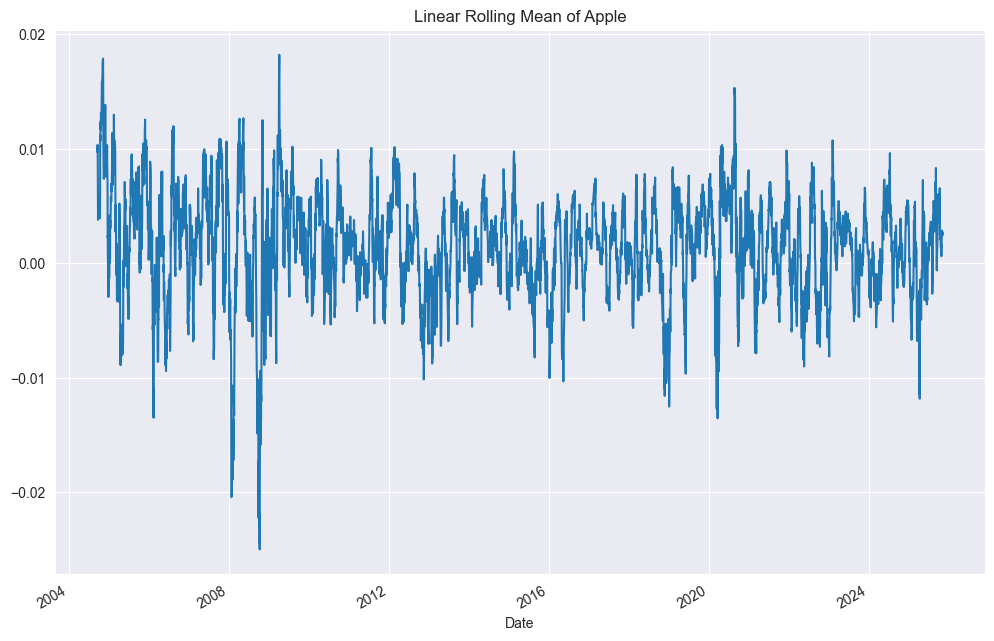

In [201]:
rolling_mean["Linear Returns", "AAPL"].plot(title="Linear Rolling Mean of Apple", figsize=(12, 8))

In [202]:
rolling_std = returns.rolling(window = 20).std()
rolling_std

Linear Returns                                         Log Returns  \
Ticker               AAPL      AMZN     GOOGL      MSFT       SPY        AAPL   
Date                                                                            
2004-08-20            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-23            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-24            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-25            NaN       NaN       NaN       NaN       NaN         NaN   
2004-08-26            NaN       NaN       NaN       NaN       NaN         NaN   
...                   ...       ...       ...       ...       ...         ...   
2025-10-29       0.015392  0.017225  0.017599  0.009799  0.008826    0.015392   
2025-10-30       0.015389  0.018805  0.018102  0.011885  0.009254    0.015389   
2025-10-31       0.015458  0.028176  0.018093  0.012405  0.009268    0.015458   
2025-11-03       0.015451  0.029204  0.017813  0.011318  0.009250    0.015451   
2025-11-04       0.015434  0.029767  0.018058  0.011222  0.009636    0.015434   

                                                    
Ticker          AMZN     GOOGL      MSFT       SPY  
Date                                                
2004-08-20       NaN       NaN       NaN       NaN  
2004-08-23       NaN       NaN       NaN       NaN  
2004-08-24       NaN       NaN       NaN       NaN  
2004-08-25       NaN       NaN       NaN       NaN  
2004-08-26       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...  
2025-10-29  0.017225  0.017599  0.009799  0.008826  
2025-10-30  0.018805  0.018102  0.011885  0.009254  
2025-10-31  0.028176  0.018093  0.012405  0.009268  
2025-11-03  0.029204  0.017813  0.011318  0.009250  
2025-11-04  0.029767  0.018058  0.011222  0.009636  

[5337 rows x 10 columns]

<Axes: title={'center': 'Log Rolling Volatility of MSFT'}, xlabel='Date'>

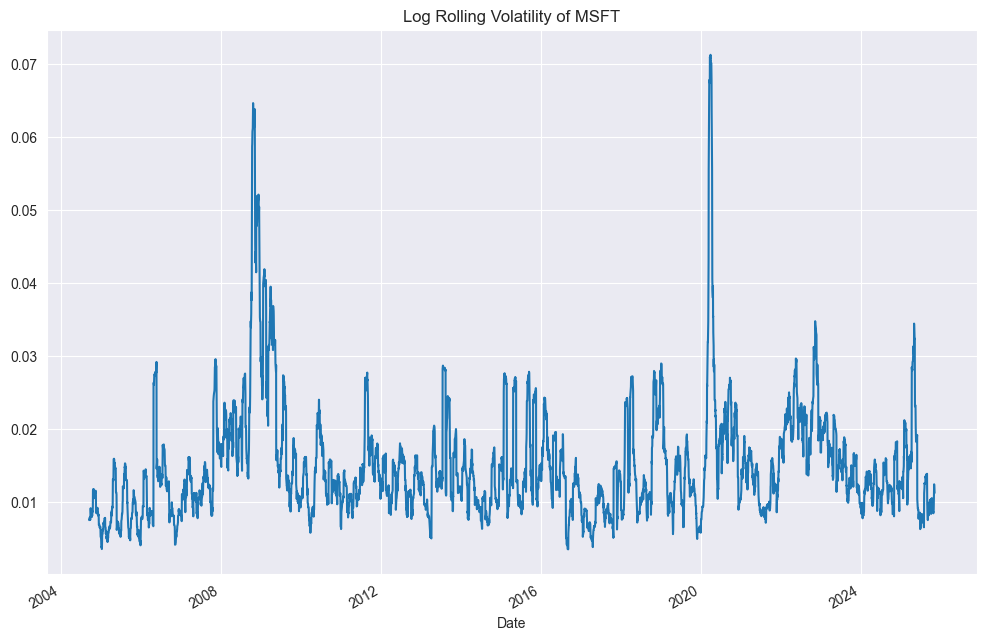

In [203]:
rolling_std["Log Returns", "MSFT"].plot(title="Log Rolling Volatility of MSFT", figsize=(12, 8))

🔁 8. Correlation Analysis

Goal: understand how stocks move together.

Compute the correlation matrix of returns.

Visualize it with a heatmap

In [272]:
varcov_log = returns["Log Returns"].corr()
varcov_log

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Ticker,,,,,
AAPL,1.000000,0.454883,0.513794,0.521662,0.630620
AMZN,0.454883,1.000000,0.514234,0.527503,0.574874
GOOGL,0.513794,0.514234,1.000000,0.558716,0.628206
MSFT,0.521662,0.527503,0.558716,1.000000,0.733109
SPY,0.630620,0.574874,0.628206,0.733109,1.000000


In [218]:
import seaborn as sns

<Axes: xlabel='Ticker', ylabel='Ticker'>

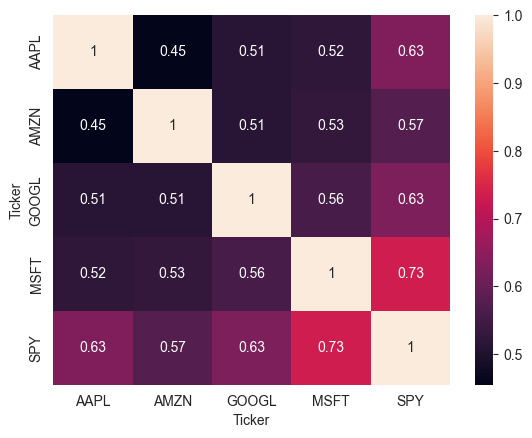

In [222]:
sns.heatmap(varcov_log, annot=True)

📉 9. Aggregate Performance

Goal: show cumulative growth and drawdowns.

Compute cumulative returns: \( (1 + r_t).cumprod() - 1 \)

Compute drawdowns: distance from historical peak.

Plot cumulative returns and drawdown charts.

In [236]:
lin_returns = returns["Linear Returns"]
cum_lin_returns =  np.cumprod(1+lin_returns)-1

In [238]:
cum_lin_returns

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2004-08-20,0.002930,0.022780,0.079430,0.002950,0.007019
2004-08-23,0.012048,0.021227,0.090293,0.007388,0.004466
2004-08-24,0.040378,0.010872,0.045146,0.007388,0.005833
2004-08-25,0.076197,0.043231,0.056408,0.018851,0.012670
2004-08-26,0.128623,0.040383,0.075443,0.014785,0.012670
...,...,...,...,...,...
2025-10-29,584.084503,118.233760,109.100583,31.342535,8.318696
2025-10-30,587.772426,114.381830,111.871445,30.399523,8.216207
2025-10-31,585.537957,125.440594,111.755153,29.924731,8.246438


<Axes: title={'center': 'Cumulative Linear Returns'}, xlabel='Date'>

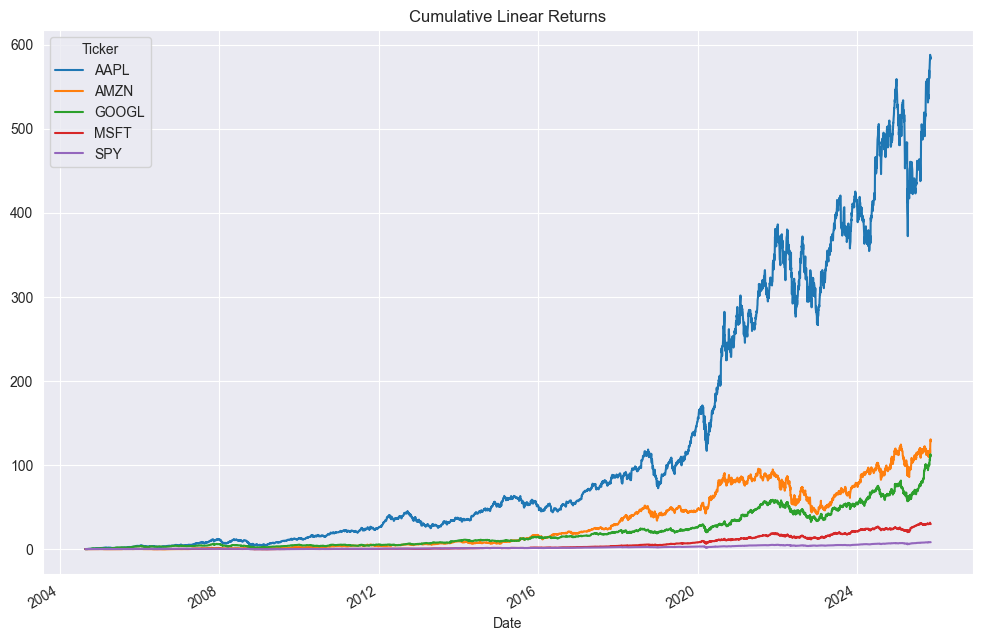

In [240]:
cum_lin_returns.plot(title="Cumulative Linear Returns", figsize=(12, 8))

In [290]:
rolling_max = lin_returns.rolling(window=1).max()
drawdown = (1+np.cumprod((1+lin_returns)))/rolling_max -1
drawdown

Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2004-08-20,682.547990,87.795394,25.179431,6.779770e+02,2.849578e+02
2004-08-23,220.322298,-1331.968683,206.701522,4.526437e+02,-7.918963e+02
2004-08-24,71.889575,-199.322476,-50.390142,inf,1.472857e+03
2004-08-25,59.303830,62.830406,189.839500,1.764134e+02,2.951248e+02
2004-08-26,42.696078,-748.511604,114.183565,-5.057417e+02,inf
...,...,...,...,...,...
2025-10-29,225218.974181,26249.961373,4184.358813,-3.475736e+04,2.148141e+04
2025-10-30,93565.672764,-3603.517084,4523.698524,-1.112209e+03,-9.299049e+02
2025-10-31,-154814.579483,1328.654024,-110410.856358,-2.112286e+03,3.122721e+03


<Axes: title={'center': "Stocks's Drawdowns"}, xlabel='Date'>

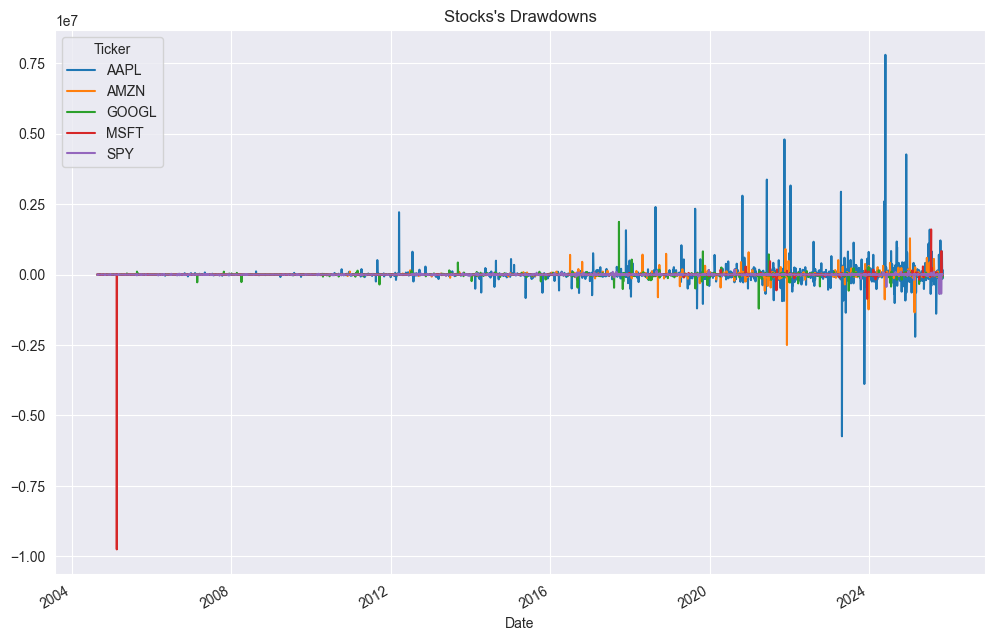

In [316]:
drawdown.plot(title="Stocks's Drawdowns", figsize=(12, 8))

🧠 10. Conclusions

Goal: interpret the results.

Which stocks are more volatile?

Which are most correlated with the index?

In [340]:
print("The most volatile stock is ", stats.idxmax(axis=1).loc["std"], "with a volatilty of", stats.loc["std"].max())
print("The stock which is most correlated with the index is ", varcov_log.drop(columns = {"SPY"}).idxmax(axis=1).loc["SPY"], "with a correlation of", varcov_log.drop(columns = {"SPY"}).loc["SPY"].max())
print("The stock which had the highest drowdown was ", drawdown.min().idxmin())

The most volatile stock is  ('Linear Returns', 'AMZN') with a volatilty of 0.023856403717410313
The stock which is most correlated with the index is  MSFT with a correlation of 0.7331089920181241
The stock which had the highest drowdown was  MSFT


In [322]:
varcov_log.drop(columns = {"SPY"}).loc["SPY"].max()

np.float64(0.7331089920181241)

In [324]:
stats.loc["std"].max()

np.float64(0.023856403717410313)